In [5]:
# 코랩에 나눔고딕 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

- 위 코드 실행 후, [런타임] - [런타임 다시 시작] - 알림창에 [예] 클릭

In [83]:
%matplotlib inline  

import matplotlib as mpl  
import matplotlib.pyplot as plt  
import matplotlib.font_manager as fm  

import seaborn as sns 

In [2]:
plt.rc('font', family='NanumBarunGothic') 

## 상가(상권)정보
> - 데이터 출처: [소상공인시장진흥공단_상가(상권)정보](https://www.data.go.kr/dataset/15012005/fileData.do)

In [7]:
# 구글 드라이브 마운트하기.
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [10]:
import zipfile
import os
import sys

def unzip(source_file, dest_path):
    with zipfile.ZipFile(source_file, 'r') as zf:
        zipInfo = zf.infolist()
        for member in zipInfo:
            try:
                print(member.filename.encode('cp437').decode('euc-kr', 'ignore'))
                member.filename = member.filename.encode('cp437').decode('euc-kr', 'ignore')
                zf.extract(member, dest_path)
            except:
                print(source_file)
                raise Exception('what?!')

source_file = '/content/gdrive/MyDrive/ecothonCBB/data/상권/소상공인시장진흥공단_상가(상권)정보_20230331.zip'
dest_path = '/content/gdrive/MyDrive/ecothonCBB/data/상권/소상공인'

unzip(source_file, dest_path)

[필독]파일열람방법.txt
소상공인시장진흥공단_상가(상권)정보_강원_202303.csv
소상공인시장진흥공단_상가(상권)정보_경기_202303.csv
소상공인시장진흥공단_상가(상권)정보_경남_202303.csv
소상공인시장진흥공단_상가(상권)정보_경북_202303.csv
소상공인시장진흥공단_상가(상권)정보_광주_202303.csv
소상공인시장진흥공단_상가(상권)정보_대구_202303.csv
소상공인시장진흥공단_상가(상권)정보_대전_202303.csv
소상공인시장진흥공단_상가(상권)정보_부산_202303.csv
소상공인시장진흥공단_상가(상권)정보_서울_202303.csv
소상공인시장진흥공단_상가(상권)정보_세종_202303.csv
소상공인시장진흥공단_상가(상권)정보_업종분류(2302)_및_연계표_v1.0.xlsx
소상공인시장진흥공단_상가(상권)정보_울산_202303.csv
소상공인시장진흥공단_상가(상권)정보_인천_202303.csv
소상공인시장진흥공단_상가(상권)정보_전남_202303.csv
소상공인시장진흥공단_상가(상권)정보_전북_202303.csv
소상공인시장진흥공단_상가(상권)정보_제주_202303.csv
소상공인시장진흥공단_상가(상권)정보_충남_202303.csv
소상공인시장진흥공단_상가(상권)정보_충북_202303.csv


In [11]:
import glob
import pandas as pd

filepaths = list(glob.glob(f'{dest_path}/*.csv'))

len(filepaths)

17

In [12]:
# 서울 상권 데이터 확인
filepaths[8]

'/content/gdrive/MyDrive/ecothonCBB/data/상권/소상공인/소상공인시장진흥공단_상가(상권)정보_서울_202303.csv'

### 데이터로드

In [13]:
df = pd.read_csv(filepaths[8], low_memory=False)
print(df.shape)
display(df.head(2))

(474260, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708


In [14]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [17]:
# group by count 상권업종대분류명
df_big_shop_cnt = df['상권업종대분류명'].value_counts()
df_big_shop_cnt

음식         129142
소매         104565
과학·기술       84935
수리·개인       49116
부동산         27190
교육          24817
시설관리·임대     21012
예술·스포츠      19953
보건의료         7226
숙박           6304
Name: 상권업종대분류명, dtype: int64

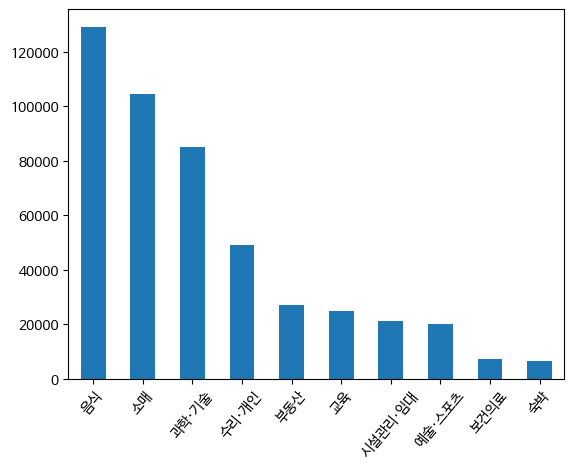

In [19]:
#상권업종대분류명 그래프 
df_big_shop_cnt.plot.bar()
plt.xticks(rotation=50)
plt.show()

#### ※ 서울에는 음식과 소매 업종이 가장 많다는 것을 알 수 있다.

In [74]:
# group by count 시군구명
df_sg_shop_cnt = df['시군구명'].value_counts()
df_sg_shop_cnt

강남구     55953
서초구     33742
송파구     29691
마포구     26223
영등포구    25004
강서구     23419
중구      22359
종로구     18558
관악구     17412
구로구     16279
강동구     16259
광진구     16227
금천구     16070
성동구     15195
동대문구    14786
은평구     14692
용산구     14234
양천구     13577
성북구     13539
중랑구     13310
노원구     13283
서대문구    12331
동작구     11625
강북구     11496
도봉구      8996
Name: 시군구명, dtype: int64

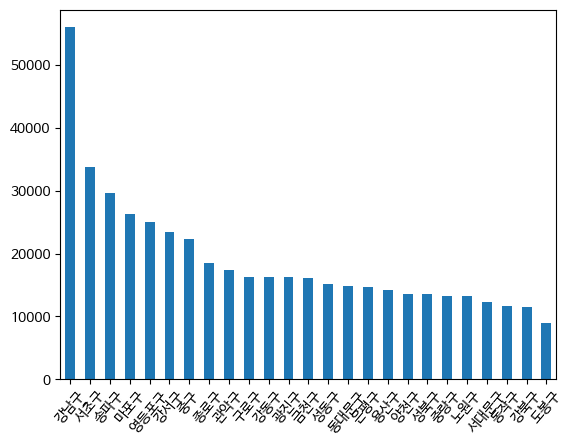

In [23]:
#시군구명 그래프 
df_sg_shop_cnt.plot.bar()
plt.xticks(rotation=50)
plt.show()

#### ※ 역시나 강남구에 상가들이 가장 많이 있다. 그 뒤를 서초구, 송파구 등이 따라오고 있다.
- cf. 서울에는 25개의 자치구와 426개의 행정동이 있다.

### 각 시군구별 (2023 1/4) 인구 대비 상가의 수 비교
> - 데이터 출처: [서울시 주민등록인구 (구별) 통계](https://data.seoul.go.kr/dataList/419/S/2/datasetView.do)

In [58]:
df_pop = pd.read_csv('/content/gdrive/MyDrive/ecothonCBB/data/서울시_인구/주민등록인구_20230521221808.csv',
                     header= 1) # 첫 번째 행을 컬럼으로 지정
print(df_pop.shape)
display(df_pop.head())

(26, 14)


,동별(1),동별(2),세대 (세대),계,한국인,등록외국인,세대당인구,65세이상고령자,세대 (세대).1,계.1,한국인.1,등록외국인.1,세대당인구.1,65세이상고령자.1
0,합계,소계,4446296,9667669,9428372,239297,2.12,1667411,4463385,9668008,9426404,241604,2.11,1690961
1,합계,종로구,72524,152211,141379,10832,1.95,27958,72679,152212,141060,11152,1.94,28265
2,합계,중구,63139,130785,120437,10348,1.91,25055,63862,131390,120963,10427,1.89,25353
3,합계,용산구,109805,233284,218650,14634,1.99,39037,109735,232482,217756,14726,1.98,39478
4,합계,성동구,133305,288234,281000,7234,2.11,47720,133513,287240,280240,7000,2.10,48238


In [59]:
df_pop.columns

Index(['동별(1)', '동별(2)', '세대 (세대)', '계', '한국인', '등록외국인', '세대당인구', '65세이상고령자',
       '세대 (세대).1', '계.1', '한국인.1', '등록외국인.1', '세대당인구.1', '65세이상고령자.1'],
      dtype='object')

In [62]:
# 사용할 컬럼만 추출
df_pop = df_pop[['동별(2)', '세대 (세대).1', '계.1', '한국인.1', '등록외국인.1', '세대당인구.1', '65세이상고령자.1']]
df_pop.head()

,동별(2),세대 (세대).1,계.1,한국인.1,등록외국인.1,세대당인구.1,65세이상고령자.1
0,소계,4463385,9668008,9426404,241604,2.11,1690961
1,종로구,72679,152212,141060,11152,1.94,28265
2,중구,63862,131390,120963,10427,1.89,25353
3,용산구,109735,232482,217756,14726,1.98,39478
4,성동구,133513,287240,280240,7000,2.10,48238


In [63]:
# 첫번째 행을 삭제
df_pop = df_pop.drop(df_pop.index[0])
df_pop.head()

,동별(2),세대 (세대).1,계.1,한국인.1,등록외국인.1,세대당인구.1,65세이상고령자.1
1,종로구,72679,152212,141060,11152,1.94,28265
2,중구,63862,131390,120963,10427,1.89,25353
3,용산구,109735,232482,217756,14726,1.98,39478
4,성동구,133513,287240,280240,7000,2.10,48238
5,광진구,169787,350925,336801,14124,1.98,54854


In [78]:
# 전체 열 이름 입력하기
df_pop.columns = ['시군구별', '세대', '인구합계', '한국인', '등록외국인', '세대당인구', '65세이상고령자']
df_pop.head()

,시군구별,세대,인구합계,한국인,등록외국인,세대당인구,65세이상고령자
1,종로구,72679,152212,141060,11152,1.94,28265
2,중구,63862,131390,120963,10427,1.89,25353
3,용산구,109735,232482,217756,14726,1.98,39478
4,성동구,133513,287240,280240,7000,2.10,48238
5,광진구,169787,350925,336801,14124,1.98,54854


In [79]:
# 사용할 컬럼만 추출2
df_pop2 = df_pop[['시군구별', '인구합계']]
df_pop2.head()

,시군구별,인구합계
1,종로구,152212
2,중구,131390
3,용산구,232482
4,성동구,287240
5,광진구,350925


#### ※ 'df_sg_shop_cnt' 시군구별 상가수 데이터는 시리즈 타입으로 되어 있으므로, 이것을 DataFrame으로 바꾸고 칼럼명 조정.

In [75]:
# 시리즈 타입을 DataFrame으로 변경하기
df_sg_shop_cnt = df_sg_shop_cnt.to_frame().reset_index()

# 컬럼명을 변경하기
df_sg_shop_cnt = df_sg_shop_cnt.rename({'index':'시군구별','시군구명':'상가수'},axis='columns')

# 잘 바뀌었나 확인
df_sg_shop_cnt

,시군구별,상가수
0,강남구,55953
1,서초구,33742
2,송파구,29691
3,마포구,26223
4,영등포구,25004
5,강서구,23419
6,중구,22359
7,종로구,18558
8,관악구,17412
9,구로구,16279


#### ※ 인구 데이터셋에 상가수 데이터를 시군구명 기준으로 합치기

In [81]:
# 데이터셋 merge 하기
df_sg_pop_shp_cnt = pd.merge(df_pop2, df_sg_shop_cnt, on='시군구별')

# 데이터 확인
df_sg_pop_shp_cnt

,시군구별,인구합계,상가수
0,종로구,152212,18558
1,중구,131390,22359
2,용산구,232482,14234
3,성동구,287240,15195
4,광진구,350925,16227
5,동대문구,354884,14786
6,중랑구,389928,13310
7,성북구,441855,13539
8,강북구,296934,11496
9,도봉구,312858,8996


#### ※ 전체 인구수와 전체 상가수를 각 시군구로 나누어, 시군구별 비율을 그래프로 그리기.

In [82]:
# 시군구별 인구수 비율을 구하여 컬럼 추가.
df_sg_pop_shp_cnt['인구수_비율']=df_sg_pop_shp_cnt['인구합계']/df_sg_pop_shp_cnt['인구합계'].sum()*100

# 시군구별 상가수 비율을 구하여 컬럼 추가.
df_sg_pop_shp_cnt['상가수_비율']=df_sg_pop_shp_cnt['상가수']/df_sg_pop_shp_cnt['상가수'].sum()*100

# 데이터 확인.
df_sg_pop_shp_cnt

,시군구별,인구합계,상가수,인구수_비율,상가수_비율
0,종로구,152212,18558,1.574388,3.913043
1,중구,131390,22359,1.359018,4.714503
2,용산구,232482,14234,2.404653,3.001307
3,성동구,287240,15195,2.971036,3.203939
4,광진구,350925,16227,3.629755,3.421541
5,동대문구,354884,14786,3.670704,3.117699
6,중랑구,389928,13310,4.033178,2.806477
7,성북구,441855,13539,4.570280,2.854763
8,강북구,296934,11496,3.071305,2.423987
9,도봉구,312858,8996,3.236013,1.896850


- 각 시군구별 인구수 비율 그래프
> - 서울시에서 송파구의 인구수가 6%를 넘으며, 가장 많은 인구수 비율을 보인다.

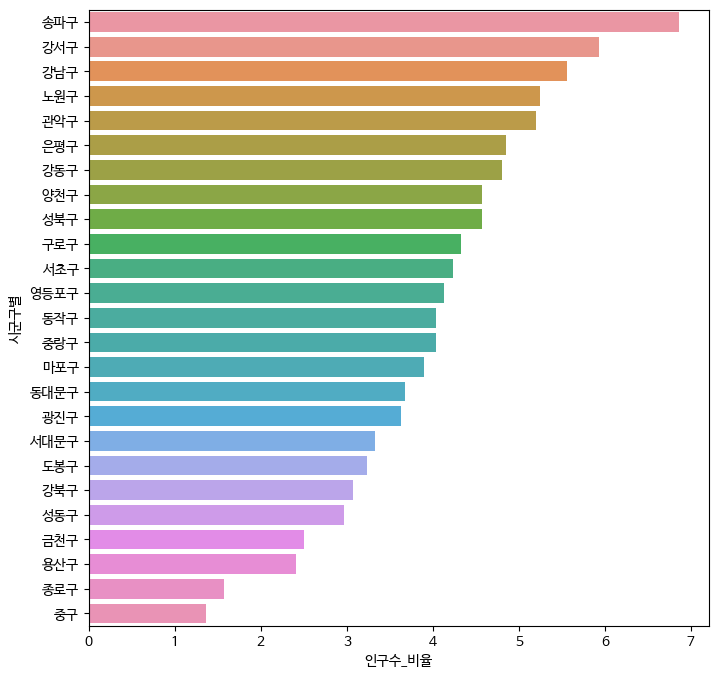

In [85]:
plt.figure(figsize=(8,8))  #size 조절
plt.xticks(rotation = 0)  #x축 조절

sns.barplot(
    data = df_sg_pop_shp_cnt.sort_values(by='인구수_비율', ascending=False),
    x = "인구수_비율",
    y = "시군구별"
    )
plt.show()

- 인구수 비율 대비 상가수 비율을 각 시군구별로 붙여서 그래프 그리기
> - 이 그래프에서 알 수 있는 것은 `각 시군구에 인구가 어느 정도 있으며, 상가도 어느 정도 있는가`이다.
> - 송파구는 인구수 비율이 가장 높았으나, 인구수에 비해 상가가 그렇게 많은 편은 아닌 것으로 보인다. 
> - 3번째로 높은 인구수 비율을 보인 강남구는 다른 시군구에 비해 가장 많은 상가수 비율을 나타낸다. 
> - 강남구, 서초구, 마포구, 영등포구 등의 순으로 인구에 비해 상가가 많은걸 확인할 수 있다. 아무래도 다른 시군구에 비해 거주인구보다 유동인구가 많아서 이런 결과가 나온 것이 아닐까 추측해본다.

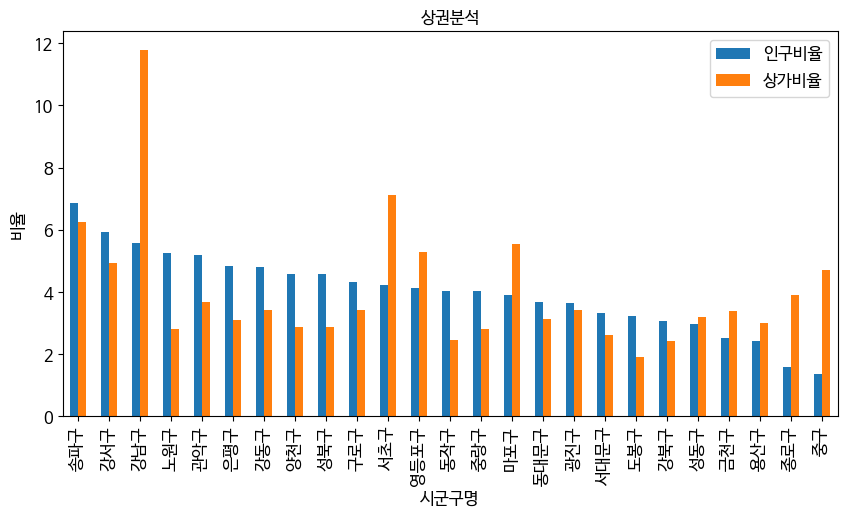

In [87]:
# 새로운 데이터셋에 시군구명, 인구수 비율, 상가수 비율 데이터만 넣기.
df_sg_pop_shp_rate = df_sg_pop_shp_cnt[["시군구별","인구수_비율","상가수_비율"]]

# 시도명을 새로운 인덱스로 지정.
df_sg_pop_shp_rate = df_sg_pop_shp_rate.set_index("시군구별")

# 그래프 그리기.
ax = df_sg_pop_shp_rate.sort_values(by='인구수_비율', ascending=False).plot(
    kind='bar', title='상권분석', figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel('시군구명', fontsize=12)          # x축 정보 표시
ax.set_ylabel('비율', fontsize=12)     # y축 정보 표시
ax.legend(['인구비율', '상가비율'], fontsize=12) 